In [1]:
# Cell 1: Import all modules from src folder
import sys
import os

# Add src folder to path
sys.path.append('../src')

# Now import your custom modules
from data_loader import load_stock_data
from technical_indicator import calculate_indicators
from pynance_metrics import calculate_finance_metrics
from visualization import plot_technical_indicators, plot_finance_metrics, plot_returns_distribution

import pandas as pd
import matplotlib.pyplot as plt

print("All modules imported successfully! ✅")

All modules imported successfully! ✅


In [2]:
# Cell 2: Load all stock data
print("Loading stock data...")
stock_data = load_stock_data()

print(f"Loaded {len(stock_data)} stocks:")
for stock_name in stock_data.keys():
    print(f"  - {stock_name}: {stock_data[stock_name].shape}")

Loading stock data...
Loaded 6 stocks:
  - AAPL: (3774, 6)
  - AMZN: (3774, 6)
  - GOOG: (3774, 6)
  - META: (2923, 6)
  - MSFT: (3774, 6)
  - NVDA: (3774, 6)


In [3]:
# Cell 3: Calculate technical indicators for all stocks
print("Calculating technical indicators...")
for stock_name, df in stock_data.items():
    indicators = calculate_indicators(df['Close'].values)
    
    # Add indicators to DataFrame
    for indicator_name, values in indicators.items():
        stock_data[stock_name][indicator_name] = values
    
    print(f"✅ {stock_name}: Added {len(indicators)} indicators")

# Show sample of results
sample_stock = list(stock_data.keys())[0]
print(f"\nSample data for {sample_stock}:")
print(stock_data[sample_stock][['Close', 'MA_20', 'RSI_14', 'MACD']].tail())

Calculating technical indicators...
✅ AAPL: Added 6 indicators
✅ AMZN: Added 6 indicators
✅ GOOG: Added 6 indicators
✅ META: Added 6 indicators
✅ MSFT: Added 6 indicators
✅ NVDA: Added 6 indicators

Sample data for AAPL:
           Close       MA_20     RSI_14      MACD
3769  191.788757  191.856618  54.672784  2.633141
3770  191.243912  192.018094  53.090049  2.304751
3771  191.342972  192.154308  53.354446  2.029104
3772  191.768951  192.362839  54.540999  1.823998
3773  190.728775  192.490633  51.121347  1.559539


In [4]:
# Cell 4: Calculate financial metrics for all stocks
print("Calculating financial metrics...")
finance_metrics = {}

for stock_name, df in stock_data.items():
    metrics = calculate_finance_metrics(df)
    finance_metrics[stock_name] = metrics
    print(f"✅ {stock_name}: {metrics['method']} method used")

# Show metrics summary
print("\nFinancial Metrics Summary:")
for stock_name, metrics in finance_metrics.items():
    print(f"\n{stock_name}:")
    for metric_name, value in metrics.items():
        if metric_name != 'method':
            print(f"  {metric_name}: {value:.4f}")

Calculating financial metrics...
✅ AAPL: manual method used
✅ AMZN: manual method used
✅ GOOG: manual method used
✅ META: manual method used
✅ MSFT: manual method used
✅ NVDA: manual method used

Financial Metrics Summary:

AAPL:
  volatility: 0.2859
  sharpe_ratio: 1.1362
  max_drawdown: -0.4380
  cumulative_return: 6907.7426

AMZN:
  volatility: 0.3465
  sharpe_ratio: 0.9472
  max_drawdown: -0.5615
  cumulative_return: 5490.1400

GOOG:
  volatility: 0.2752
  sharpe_ratio: 0.8336
  max_drawdown: -0.4460
  cumulative_return: 1660.9641

META:
  volatility: 0.4013
  sharpe_ratio: 0.6794
  max_drawdown: -0.7674
  cumulative_return: 825.8698

MSFT:
  volatility: 0.2680
  sharpe_ratio: 0.9360
  max_drawdown: -0.3715
  cumulative_return: 2395.8636

NVDA:
  volatility: 0.4590
  sharpe_ratio: 1.0304
  max_drawdown: -0.6634
  cumulative_return: 24691.7539


Plotting technical indicators...


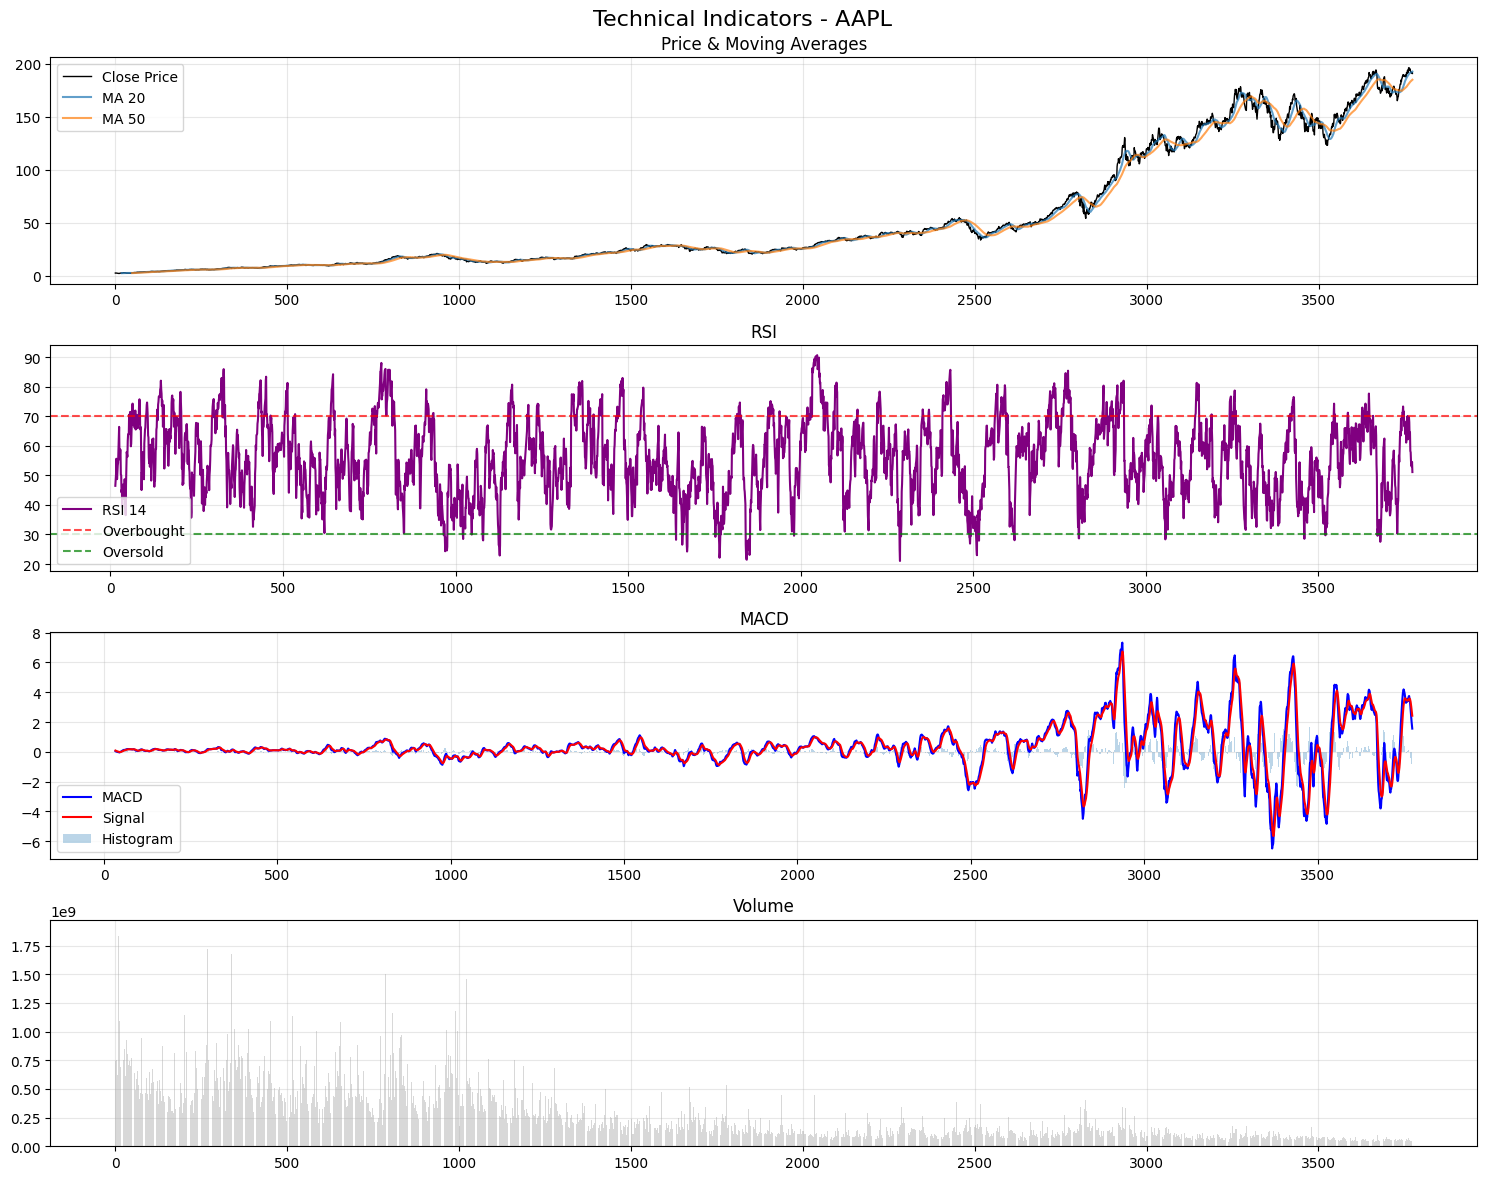

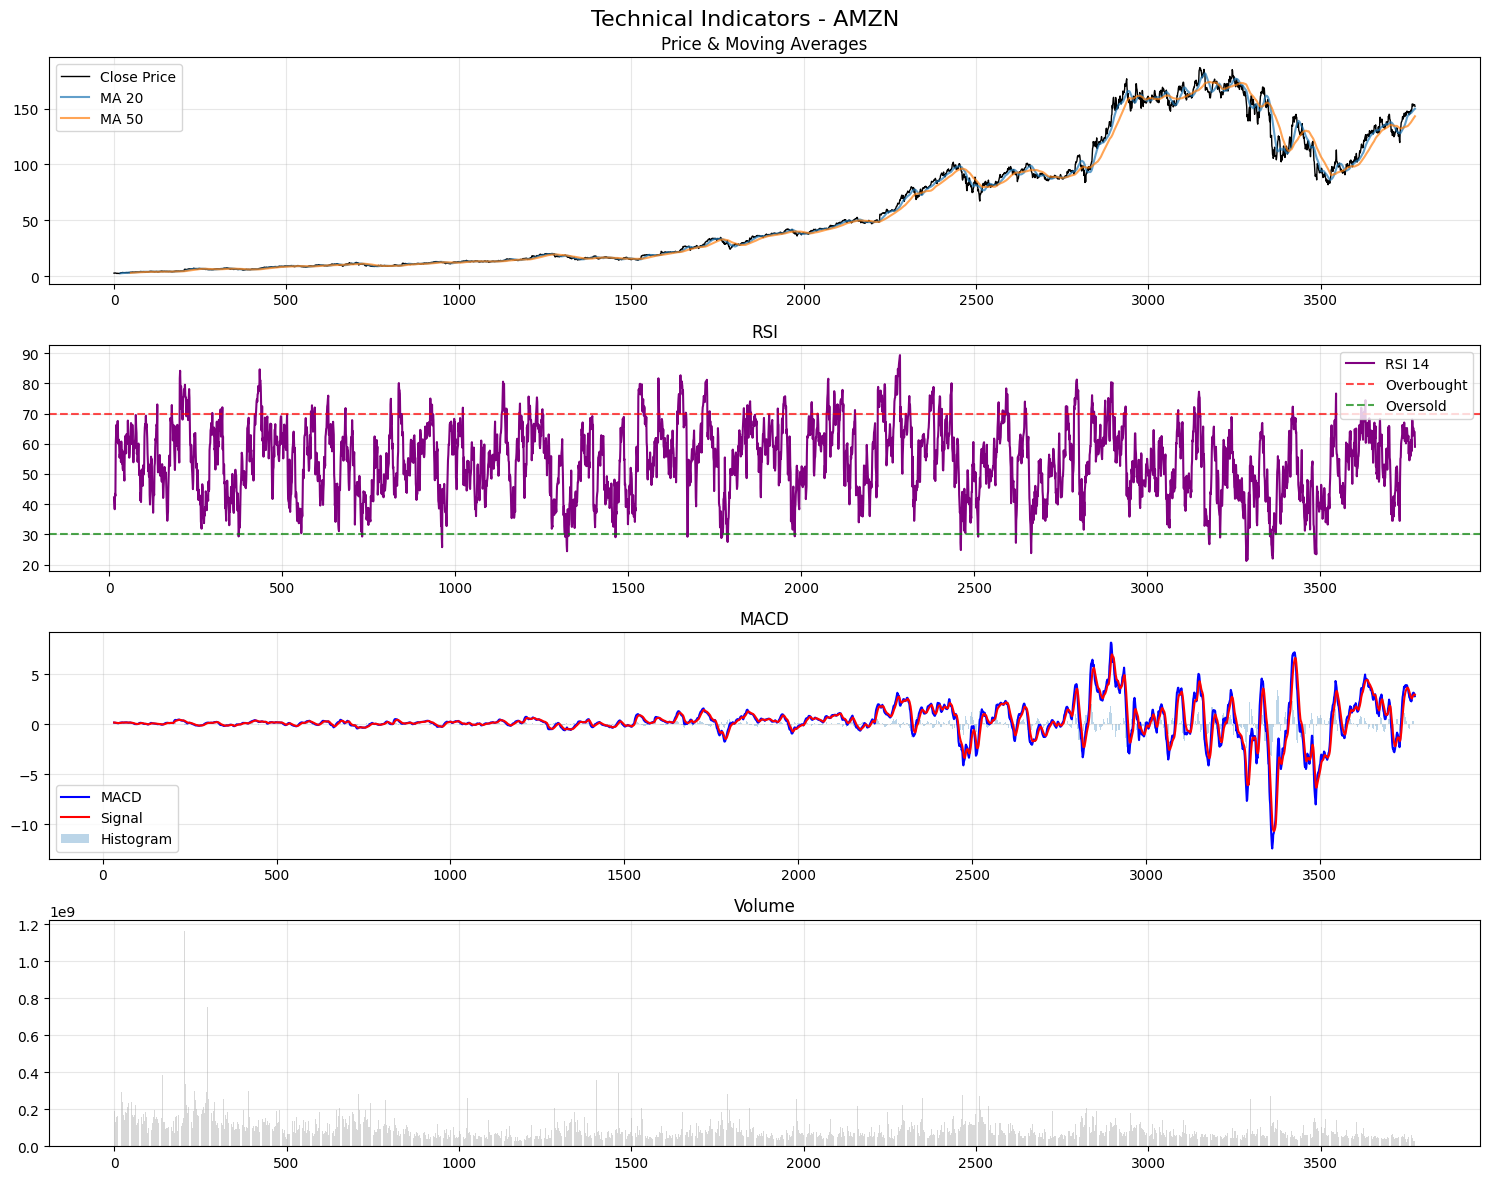

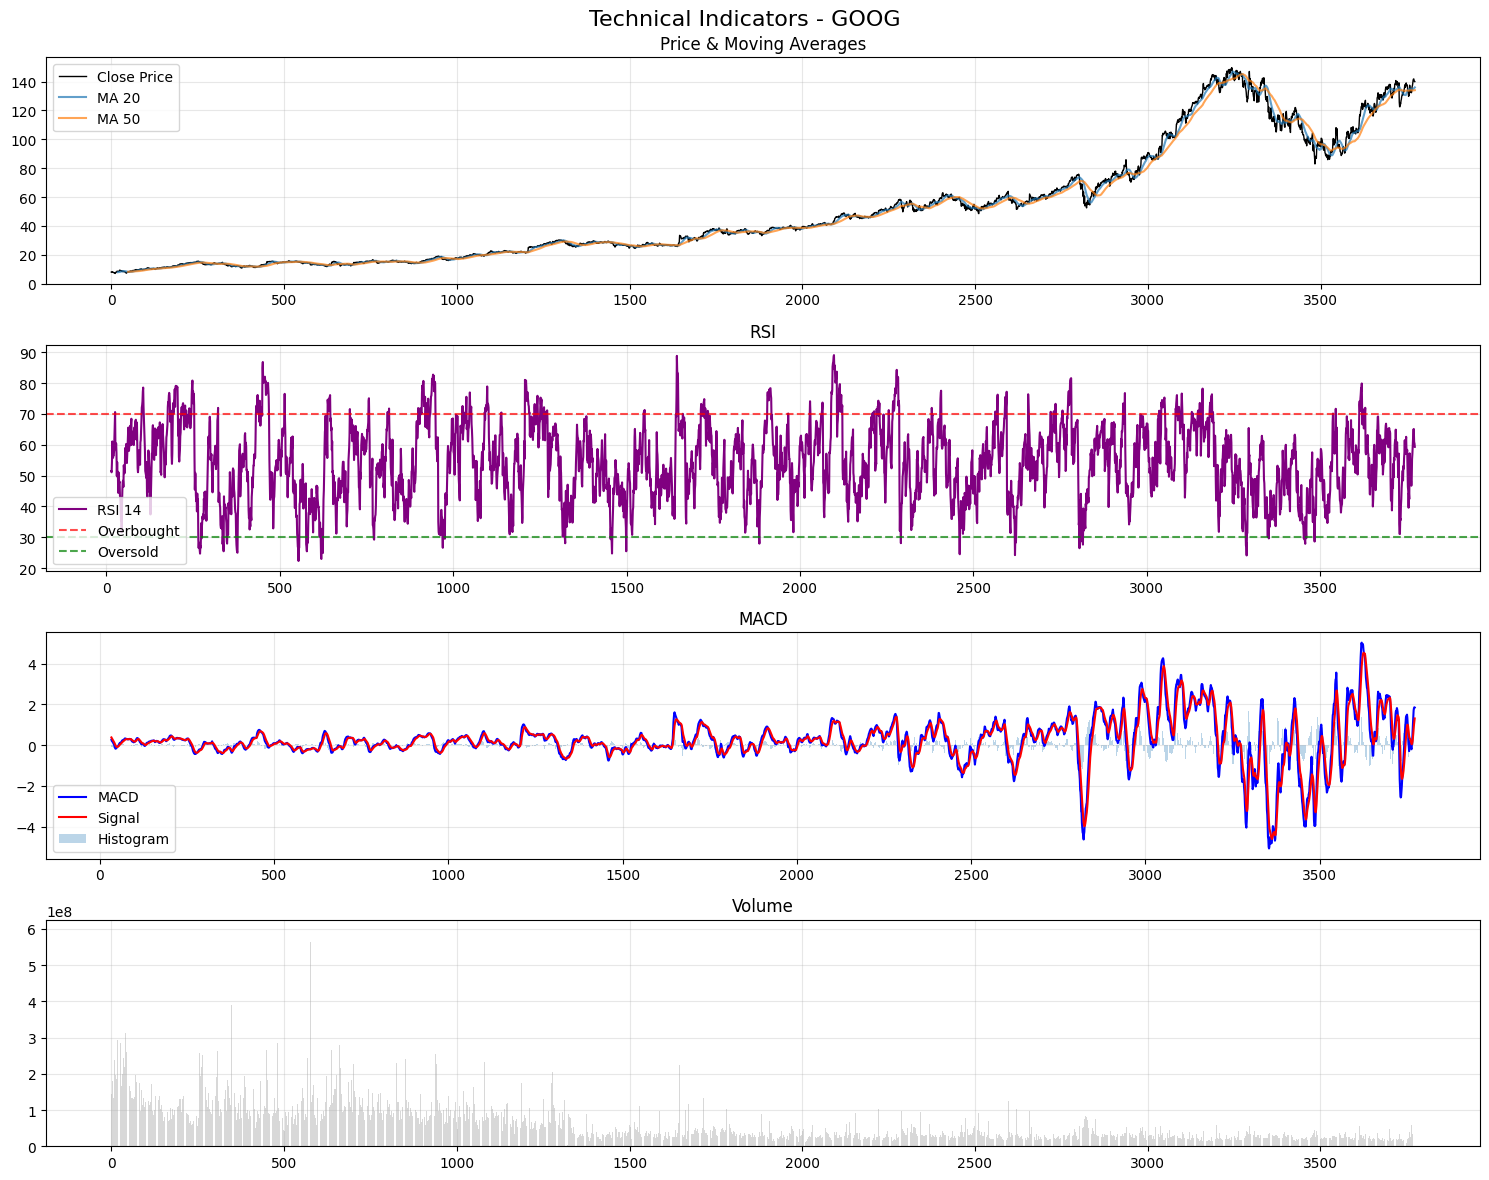

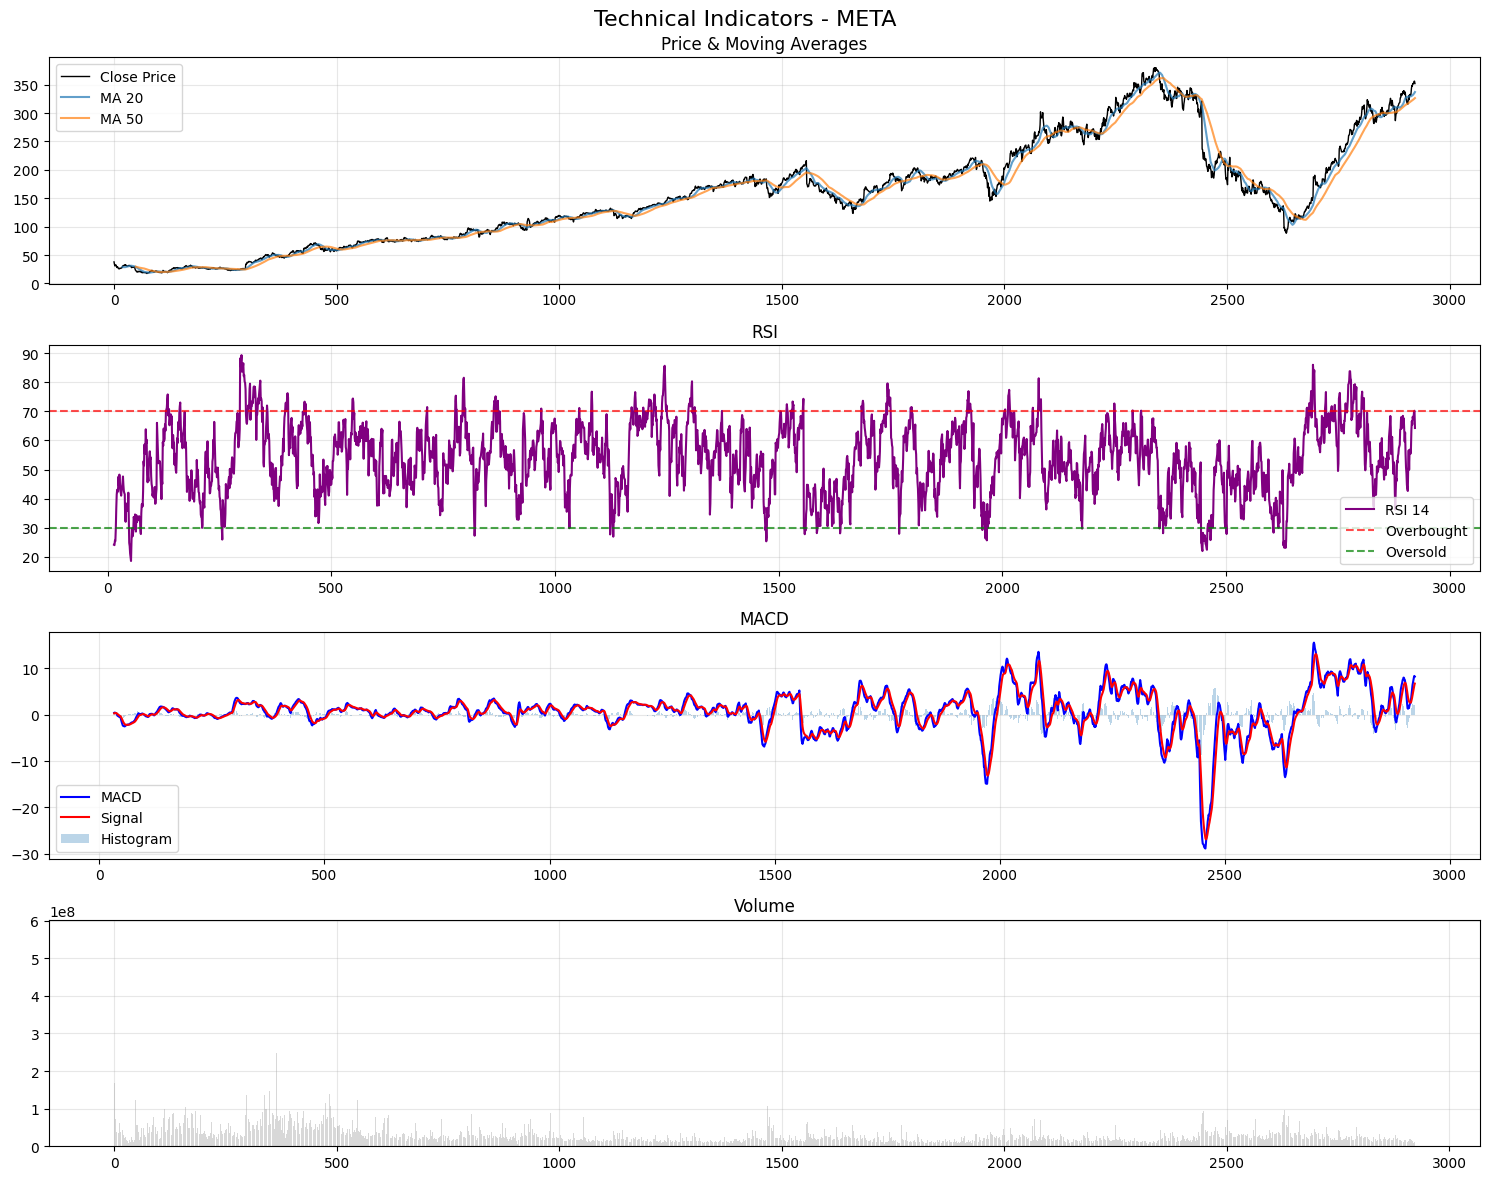

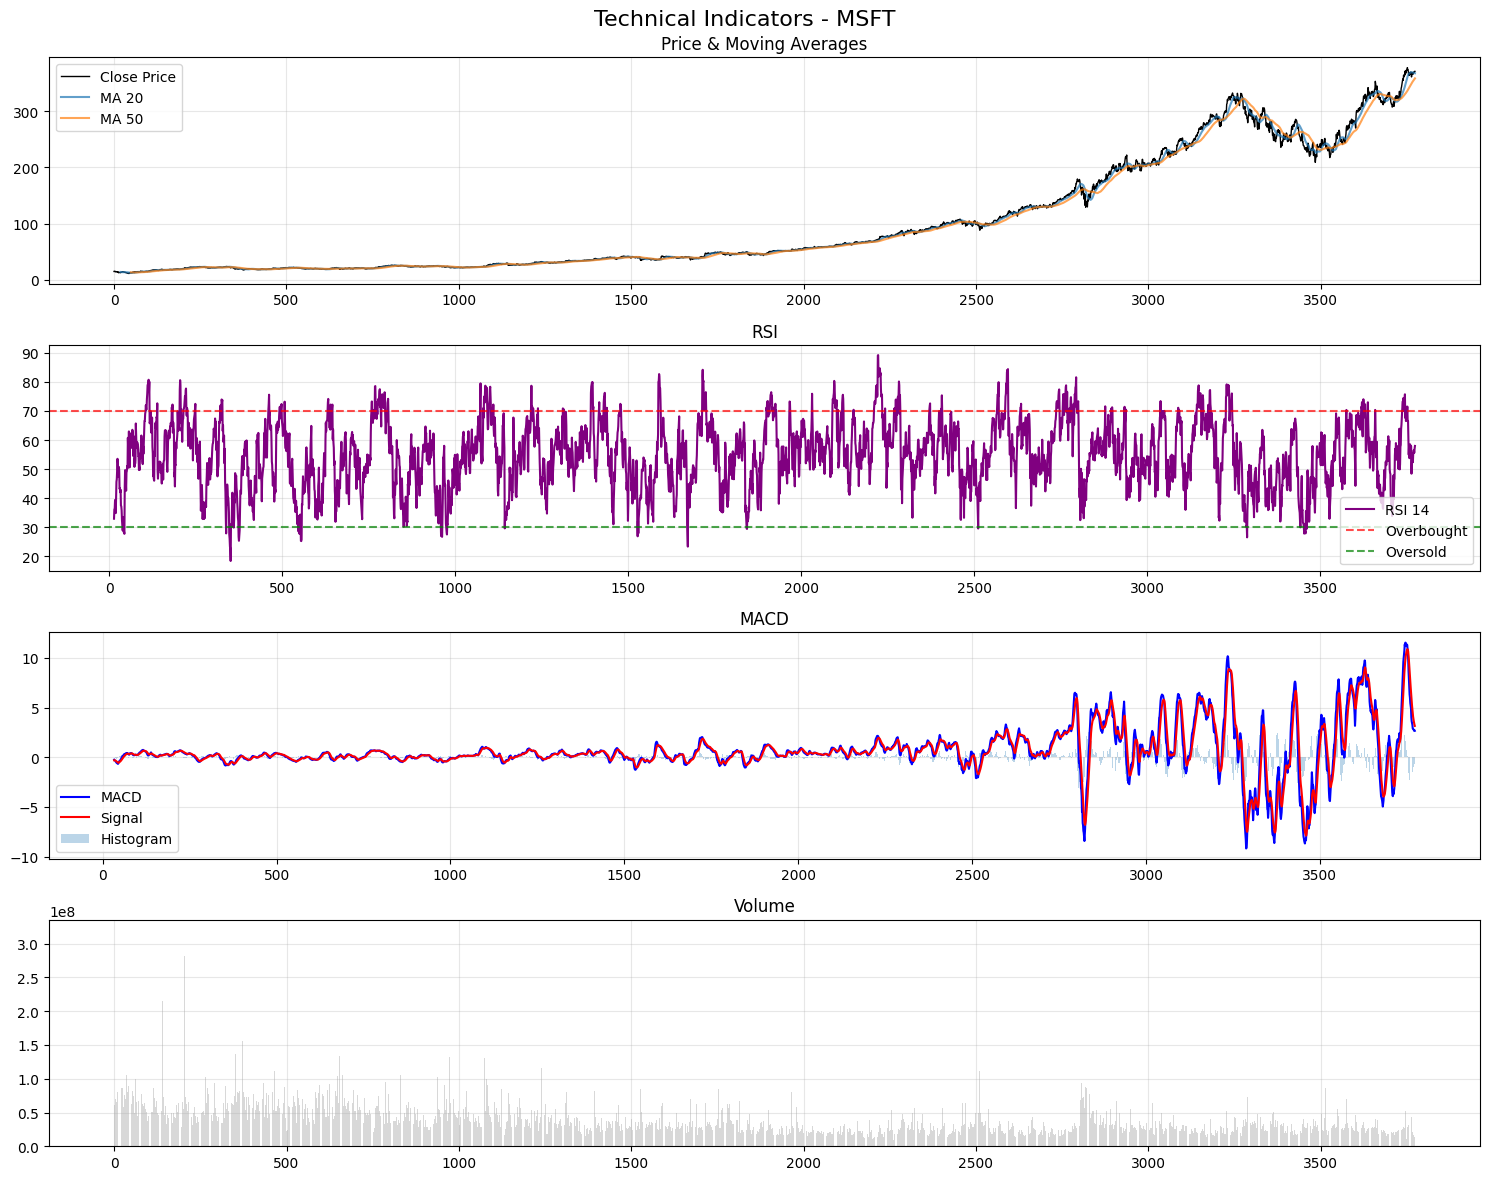

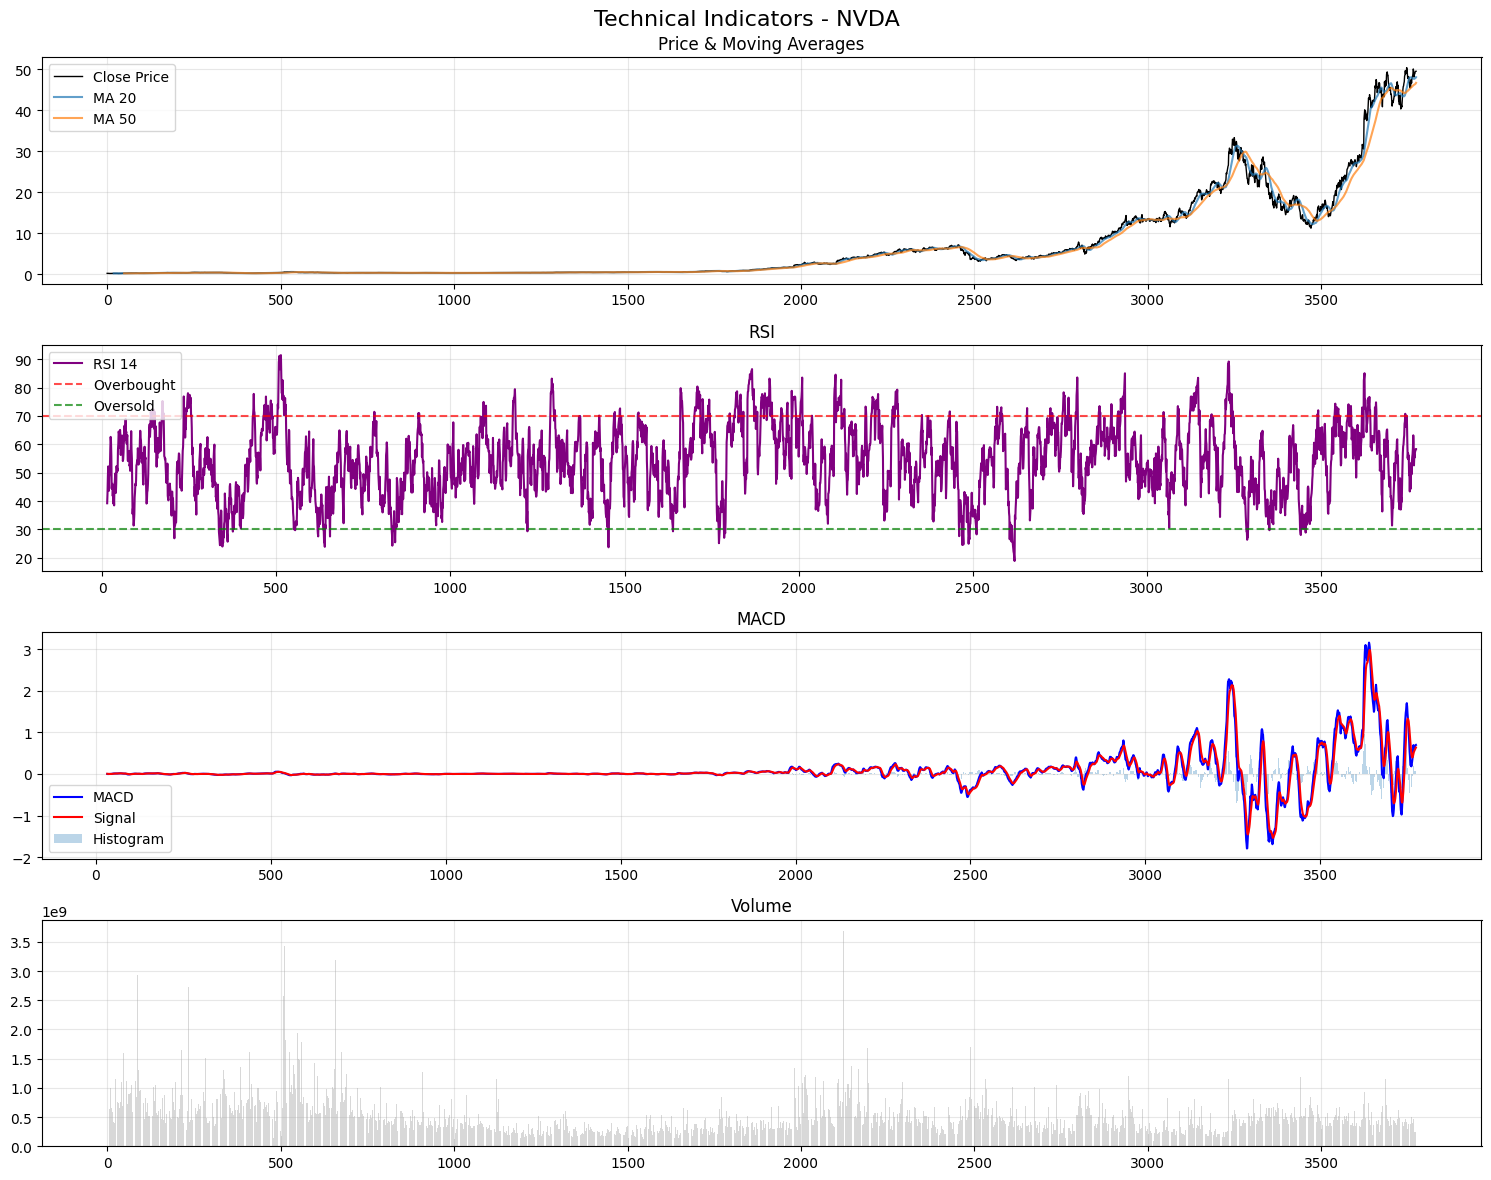

In [5]:
# Cell 5: Visualize technical indicators for each stock
print("Plotting technical indicators...")
for stock_name, df in stock_data.items():
    plot_technical_indicators(df, stock_name)

Plotting financial metrics comparison...


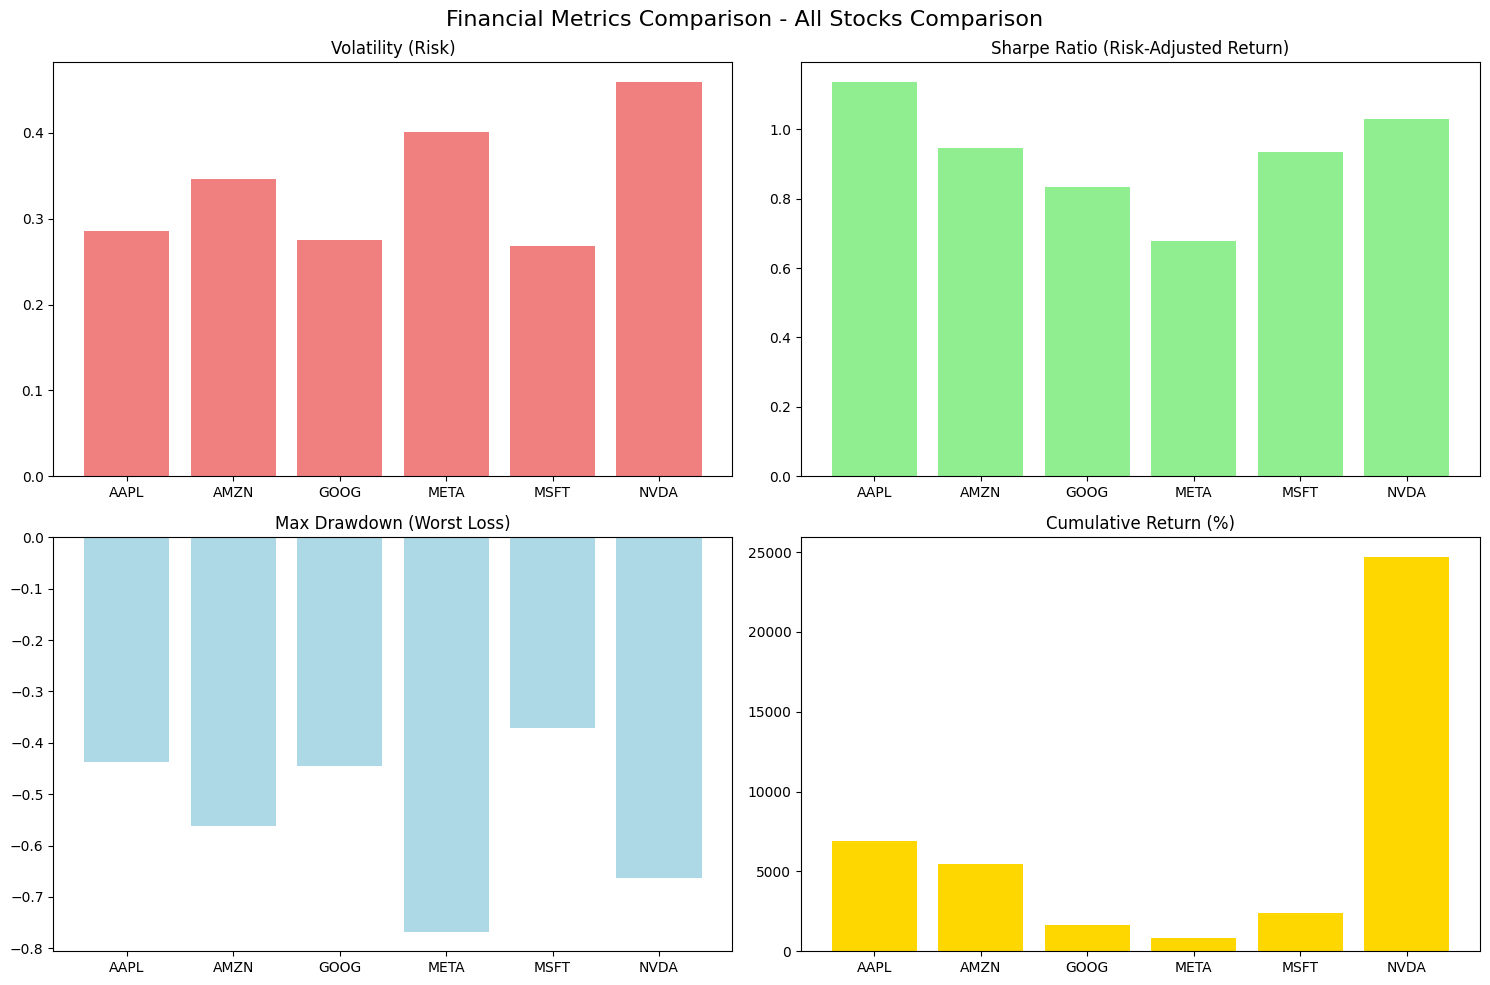

In [6]:
# Cell 6: Visualize financial metrics comparison
print("Plotting financial metrics comparison...")
plot_finance_metrics(finance_metrics, "All Stocks Comparison")

Plotting returns distributions...


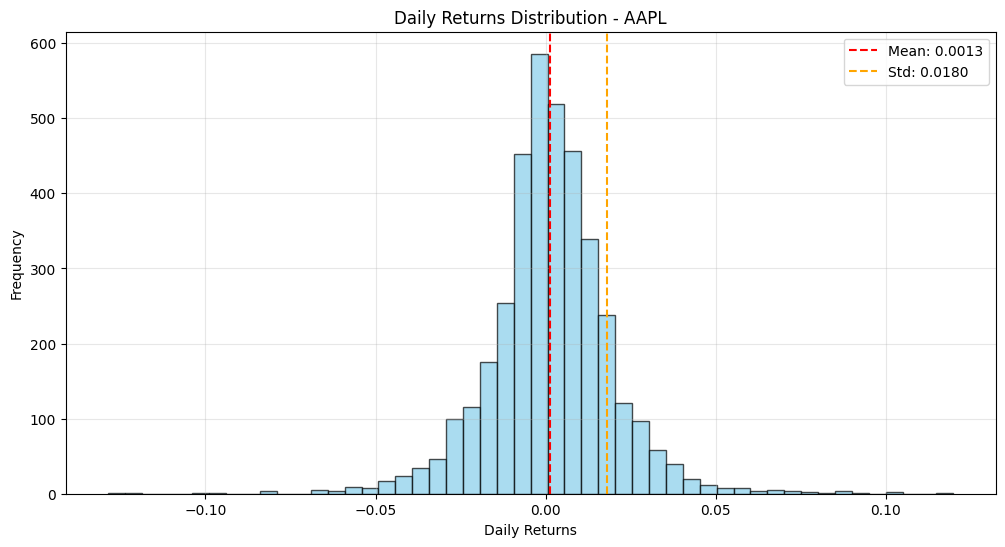

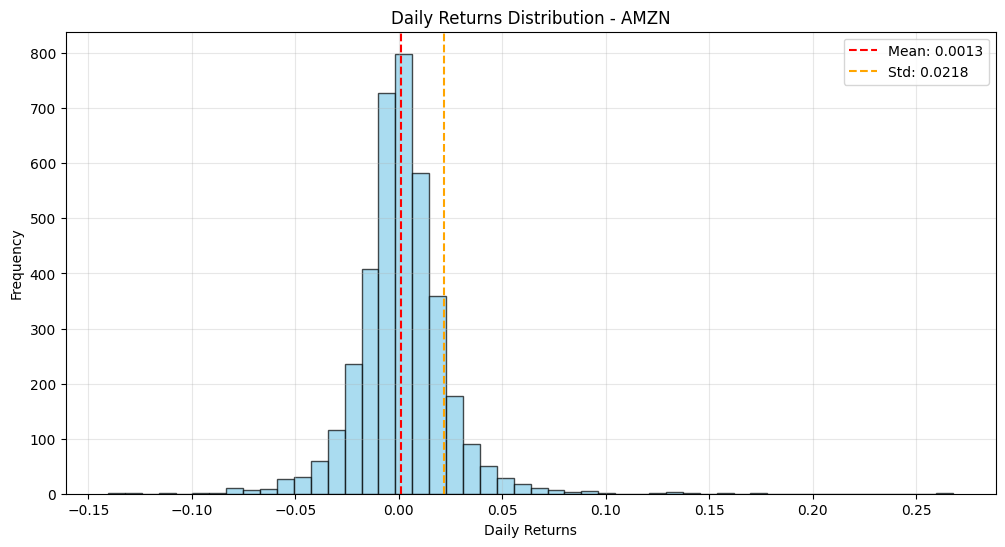

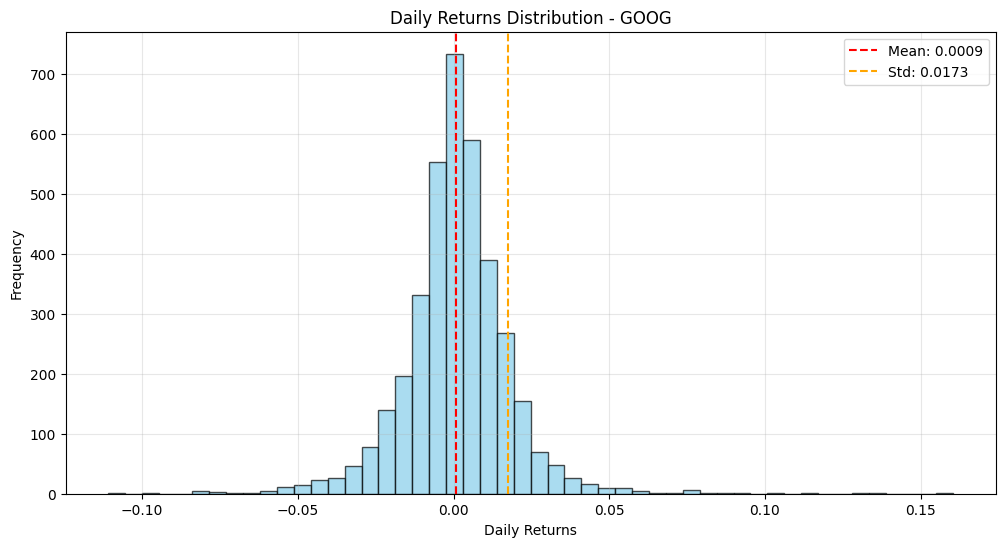

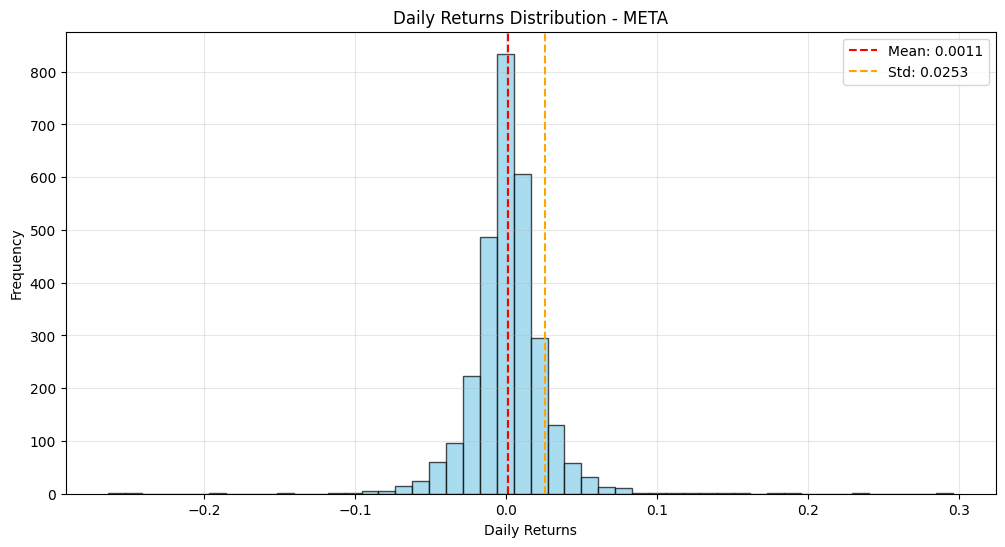

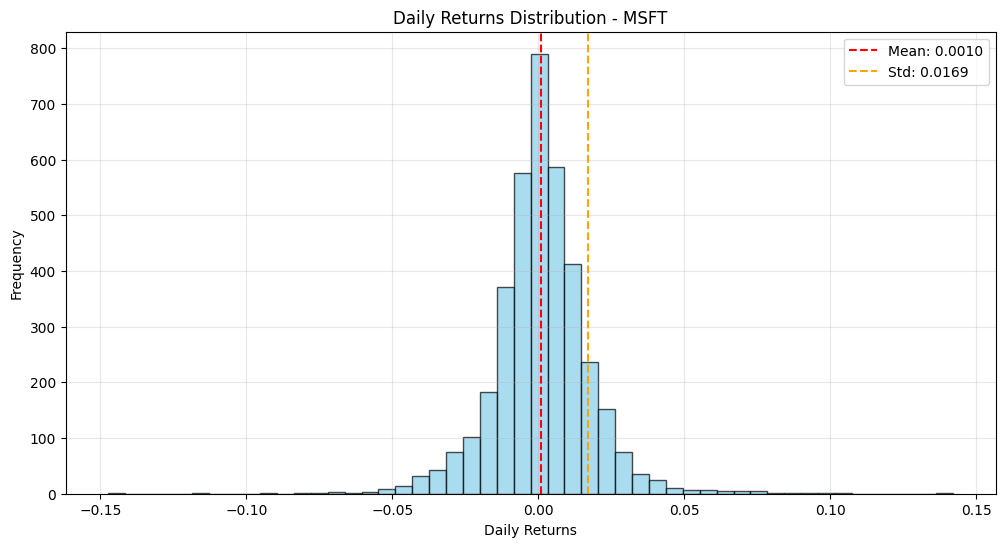

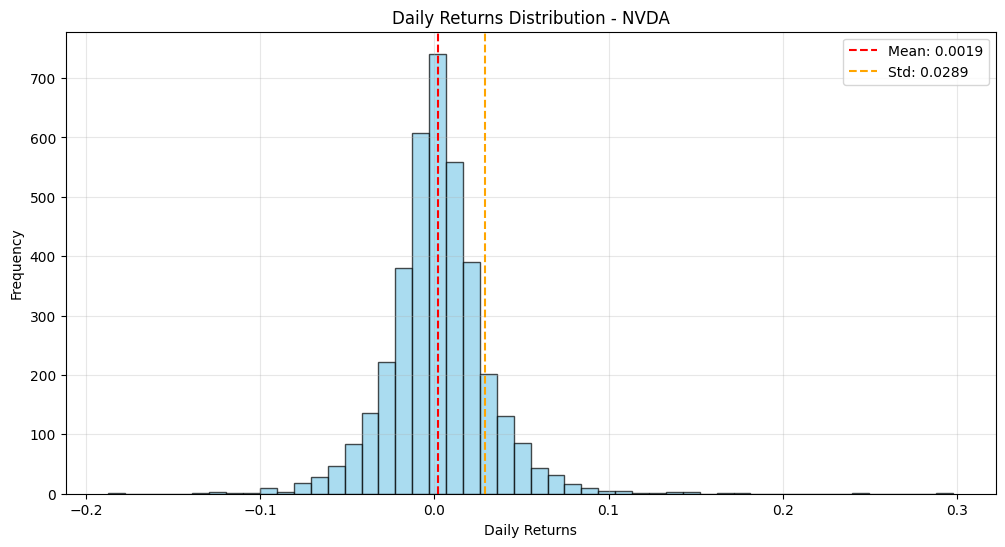

In [7]:
# Cell 7: Visualize returns distribution for each stock
print("Plotting returns distributions...")
for stock_name, df in stock_data.items():
    plot_returns_distribution(df, stock_name)